In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [15]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


###***Data Pre-processing***

In [22]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
! pip install word2number

In [27]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [36]:
mean = df['test_score(out of 10)'].mean()  #getting avg score
mean = np.floor(mean)                      #flooring the value 
mean

7.0

In [39]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [48]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,8.00000,8.000000,8.00000
mean,4.75000,7.75000,7.875000,63000.00000
std,4.26782,1.28174,1.642081,11501.55269
min,0.00000,6.00000,6.000000,45000.00000
25%,1.50000,7.00000,6.750000,57500.00000
50%,4.00000,7.50000,7.500000,63500.00000
75%,7.75000,8.25000,9.250000,70500.00000
max,11.00000,10.00000,10.000000,80000.00000


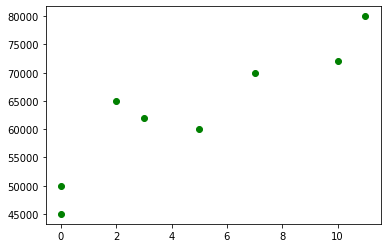

In [61]:
plt.scatter(df['experience'],df['salary($)'], color='green')

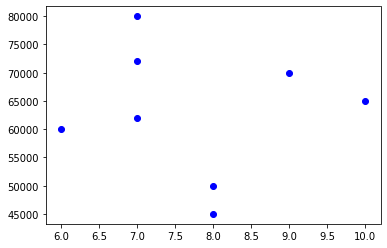

In [62]:
plt.scatter(df['test_score(out of 10)'],df['salary($)'], color='blue')

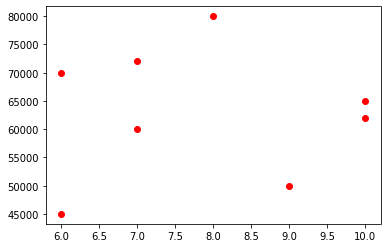

In [63]:
plt.scatter(df['interview_score(out of 10)'],df['salary($)'], color='red')

###***Linear Regression***

In [64]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

###***Predict salary of a man with 2 year experience, 9 test score, 6 interview score***

In [67]:
reg.predict([[2,9,6]])

array([53713.86677124])

###***Predict salary of a man with 12 yr experience, 10 test score, 10 interview score***

In [68]:
reg.predict([[12,10,10]])

array([93747.79628651])